# <font color=blue>Battle of Neighborhoods (Week 2)</font>

## 1. Introduction ##
### Description of the Problem ###

A restaurant is a business which prepares and serves food and drink to customers. It is no surprise to learn that owning a restaurant comes with its fair share of responsibilities that require you to be on your feet. To be successful in the long run, a restaurant needs an accessible location, a theme or style that appeals to a broad range of customers, and a solid menu. Restaurants must stand out from the crowd and finalizing a space within the budget.

So it is evident that to survive in such competitive market it is very important to startegically plan. Often there’s an issue of time constraint that keeps a restaurant owner preoccupied with intricacies. Whether it is sourcing the right ingredients, obtaining too many licences, finalizing a space within your budget to interviewing the right staff — restaurateurs have to consider everything beginning from a pin to piano before taking the right foot forward.

First move is very important, thereby choice of location is very important. So, HSB India (P) Ltd., plan to choose the correct location to start its first restaurant in Toronto, Canada. 

### Discussion of the Background - Prospects of a Indian Restaurant in Toronto, Canada. ###

Toronto, Canada's largest city is consistently rated among the world’s top most liveable cities. Toronto boasts a multicultural population, diverse neighbourhoods, and world class cultural attractions, entertainment, dining and shopping.

Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. Its varied cultural institutions, which include numerous museums and galleries, festivals and public events, entertainment districts, national historic sites, and sports activities, attract over 25 million tourists each year.

People have travelled through and inhabited the Toronto area and the diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada. According to the 2011 National Household Survey (NHS), 1,264,395 non-Whites, or 20.2% of Canada's visible minority population, live in the city of Toronto; of this, approximately 70 percent are of Asian ancestry.

These indicates that the market is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analysed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk and the Return on Investment will be reasonable.

#### Target Audience

1. Business personnel who wants to invest or open a ethnic restaurant. This analysis will be a comprehensive guide to start ot expand restaurants targeting the ethnica diversity in Toronto. 
2. Any Freelancer who wants to start a new restaurant in Toronto. 
3. New graduates, to find reasonable lunch/breakfast place close to office. 
4. Budding Data Scientists, who wants to implement some of the most used Exploratory Data Analysis techniques to obtain necessary data, analyze it and, finally be able to tell a story out of it. 

#### Success Criteria

The success criteria of the project will be a good recommendation of Borough/Neighborhood choice to HSB India (P) Ltd., based on lack of such restaurants in that location and nearest suppliers of ingredients.

## 2. Data ##

Neighborhood has a total of 11 boroughs and 103 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 11 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

Postal codes beginning with M are located within the City of Toronto in the province of Ontario. I will use the BeautifulSoup website scraping library to extract the content on the Wikipedia page (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) as XML and transfor data that is in the table of postal codes into a pandas dataframe.

I will read the csv file that has the geographical coordinates of each postal code from http://cocl.us/Geospatial_data into a pandas dataframe. Perform a merge the Latitude and Longitude from the Geospatial dataframe with the Toronto neighbourhoods using inner join.

Next will slice the dataframe to have only the boroughs that contain the word Toronto. I will use the Foursquare API to explore neighborhoods in Toronto City. Toronto City geographical coordinates data used as input for the Foursquare API, to explore venues information in each neighborhood.  

### Preparation for Data

First, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line to install geopy library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import Beautiful Soup for webscraping
from bs4 import BeautifulSoup

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line to install Folium library
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Download and Scrape the Data

I used the BeautifulSoup website scraping library to extract the content on the Wikipedia page as XML.

In [2]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
LoP_Canada = BeautifulSoup(url,'lxml')

Next, obtain the data that is in the table of postal codes and transform the data into a pandas dataframe.

In [3]:
table_LoP = LoP_Canada.find('table')
LoP_values = table_LoP.find_all('td')

postcode = []
borough = []
neighbourhood = []

for i in range(0, len(LoP_values), 3):
    postcode.append(LoP_values[i].text.strip())
    borough.append(LoP_values[i+1].text.strip())
    neighbourhood.append(LoP_values[i+2].text.strip())
        
df_LoP = pd.DataFrame(data=[postcode, borough, neighbourhood]).transpose()

# dataframe consist of three columns: PostalCode, Borough, and Neighborhood
df_LoP.columns = ['PostalCode', 'Borough', 'Neighborhood']

Let's take a quick look at the data.

In [4]:
df_LoP.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


#### Cleanup the Dataset

In [5]:
# Drop rows with Borough not assigned
df_LoP = df_LoP[~df_LoP['Borough'].str.contains("Not assigned") == True]

# More than one neighborhood for a Borough are combined into one row with the neighborhoods separated with a comma
df_gp_LoP = df_LoP.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_gp_LoP.columns = ['PostalCode', 'Borough', 'Neighborhood']

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
df_gp_LoP['Neighborhood'].replace('Not assigned', "Queen's Park", inplace=True)
df_gp_LoP

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


Read the csv file that has the geographical coordinates of each postal code from http://cocl.us/Geospatial_data into a pandas dataframe.

In [6]:
df_geo = pd.read_csv('http://cocl.us/Geospatial_data')
df_geo.columns = ['PostalCode', 'Latitude', 'Longitude']

Perform a merge the Latitude and Longitude from the Geospatial dataframe with the Toronto neighbourhoods using inner join. Print the top 5 from the merged dataframe.

In [7]:
df_pos = pd.merge(df_gp_LoP, df_geo, on=['PostalCode'], how='inner')

df_tor_neigh = df_pos[['PostalCode','Borough', 'Neighborhood', 'Latitude', 'Longitude']].copy()

df_tor_neigh.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Print the number of rows of the dataframe.

In [8]:
df_tor_neigh.shape

(103, 5)

Let's simplify the dataframe and cluster only the neighborhoods in Toronto. So let's slice the original dataframe and just take portion of dataframe where Boroughs contain word Toronto.

In [9]:
toronto_data = df_tor_neigh[df_tor_neigh['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


## 3. Methodology ##

#### Use geopy library to get the latitude and longitude values of Toronto City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent tor_explorer, as shown below.

In [10]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


Create the map with markers for Toronto Neighborhoods, where Boroughs contain word Toronto.

In [11]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Next, I am going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

### Exploring the Neighborhoods

The Foursquare API will be used to obtain the venues for the geographical location data. These will be used to explore the neighborhoods of Toronto accordingly.

    1. Create the get request url (Foursquare ID and Secret are necessary)
       a. Number of Venues we will look for is 100 
       b. Radius of Search Would be 0.5 km.
    2. Create a json from the request object (using requests Module)
    3. Create the lists containing the information
    4. Create the dataframe from the list.

In [43]:
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20190325' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your Foursquare ID
CLIENT_SECRET:your Foursquare Secret


In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


The venues within the neighborhoods of Toronto City like restaurants and proximity to amenities would be correlated. Also, accessibility and ease of supplies would be considered as it relates to venues.

In [14]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

Let's check the size of the resulting dataframe

In [15]:
print(toronto_venues.shape)
toronto_venues.head()

(1709, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


Let's check how many venues were returned for each neighborhood

In [16]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,57,57,57,57,57,57
"Brockton, Exhibition Place, Parkdale Village",21,21,21,21,21,21
Business Reply Mail Processing Centre 969 Eastern,20,20,20,20,20,20
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",15,15,15,15,15,15
"Cabbagetown, St. James Town",45,45,45,45,45,45
Central Bay Street,88,88,88,88,88,88
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,15,15,15,15,15,15


Slicing the venues dataset to have only the restaurant venues.

In [17]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

toronto_venues_only_restaurant = toronto_venues[toronto_venues['Venue Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
#toronto_venues_only_restaurant.index = np.arange(1, len(toronto_venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", toronto_venues_only_restaurant.shape)
toronto_venues_only_restaurant.head()

Shape of the Data-Frame with Venue Category only Restaurant:  (420, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
1,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
2,"The Danforth West, Riverdale",43.679557,-79.352188,Messini Authentic Gyros,43.677827,-79.350569,Greek Restaurant
3,"The Danforth West, Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
4,"The Danforth West, Riverdale",43.679557,-79.352188,7 Numbers,43.677062,-79.353934,Italian Restaurant


I am taking the top 5 neighborhoods of Toronto City thost has the maximum number of restaurants.

In [18]:
tor_ven_count = toronto_venues_only_restaurant.groupby('Neighborhood')['Venue Category'].count()
tor_resven = tor_ven_count.to_frame().sort_values('Venue Category' , ascending=False).reset_index()
tor_resven.columns = ['Neighborhood','Number of Restaurants']
tor_resven_top = tor_resven.head() 
tor_resven_top

,Neighborhood,Number of Restaurants
0,"Chinatown, Grange Park, Kensington Market",35
1,"Adelaide, King, Richmond",30
2,Church and Wellesley,29
3,"Commerce Court, Victoria Hotel",27
4,St. James Town,26


I merged the venue details of those top 5 neighborhoods of Toronto City.

In [19]:
df_top5_neigh = pd.merge(tor_resven_top, toronto_venues_only_restaurant, on=['Neighborhood'], how='inner')
df_top5_neigh.shape
df_top5_neigh.head()

,Neighborhood,Number of Restaurants,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Chinatown, Grange Park, Kensington Market",35,43.653206,-79.400049,Seven Lives - Tacos y Mariscos,43.654418,-79.400545,Mexican Restaurant
1,"Chinatown, Grange Park, Kensington Market",35,43.653206,-79.400049,Banh Mi Nguyen Huong,43.653628,-79.398376,Vietnamese Restaurant
2,"Chinatown, Grange Park, Kensington Market",35,43.653206,-79.400049,Saigon Lotus Restaurant,43.654311,-79.399225,Vietnamese Restaurant
3,"Chinatown, Grange Park, Kensington Market",35,43.653206,-79.400049,Golden Patty,43.654659,-79.401179,Caribbean Restaurant
4,"Chinatown, Grange Park, Kensington Market",35,43.653206,-79.400049,Torteria San Cosme,43.654702,-79.400646,Mexican Restaurant


#### Map Visualization

Create the map with new markers for those top 5 Toronto Neighborhoods.

In [20]:
# create map of Toronto using latitude and longitude values
map_toronto_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the top 5 neighborhoods with maximum restaurants
neighs = tor_resven_top['Neighborhood'].values.tolist()
x = np.arange(len(neighs))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to map
for lat, lng, neighborhood, vencat in zip(df_top5_neigh['Venue Latitude'], df_top5_neigh['Venue Longitude'], df_top5_neigh['Neighborhood'], df_top5_neigh['Venue Category']):
    label = '{}, {}'.format(neighborhood, vencat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[neighs.index(neighborhood)-1],
        fill=True,
        fill_color=rainbow[neighs.index(neighborhood)-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_venues)  
    
map_toronto_venues

This visualization of Toronto City shows the density of restaurants in those top 5 neighborhoods and indicates the presence of more restaurants due to multi cultural population. Let's find out how many unique categories can be curated from all these returned venues to top 5 neighborhoods.

In [21]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(df_top5_neigh['Venue Category'].unique())))
## We can check some of the categories randomly  
print (df_top5_neigh[['Venue Category']][10:25])

There are 37 unique categories.
                   Venue Category
10            Dumpling Restaurant
11             Italian Restaurant
12  Vegetarian / Vegan Restaurant
13             Mexican Restaurant
14               Ramen Restaurant
15          Vietnamese Restaurant
16             Mexican Restaurant
17            Dumpling Restaurant
18  Vegetarian / Vegan Restaurant
19             Chinese Restaurant
20                Thai Restaurant
21               Doner Restaurant
22             Chinese Restaurant
23  Vegetarian / Vegan Restaurant
24             Chinese Restaurant


We have seen that there are 37 unique categories in the Venues Data-Frame.
Let's see the Frequency of Each Category

Create a Dataframe with the 10 Most Frequently Occuring Venue Category

In [22]:
# create a dataframe of top 10 categories
df_tor_top10_mfven = df_top5_neigh['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
df_tor_top10_mfven = df_tor_top10_mfven.reset_index()

df_tor_top10_mfven.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
df_tor_top10_mfven

,Venue Category,Frequency
0,Restaurant,15
1,Japanese Restaurant,12
2,American Restaurant,11
3,Vegetarian / Vegan Restaurant,10
4,Italian Restaurant,9
5,Thai Restaurant,9
6,Sushi Restaurant,7
7,Seafood Restaurant,7
8,Chinese Restaurant,6
9,Vietnamese Restaurant,6


Let's visualize the 10 most frequent restaurant venues in the top 5 neighborhoods.

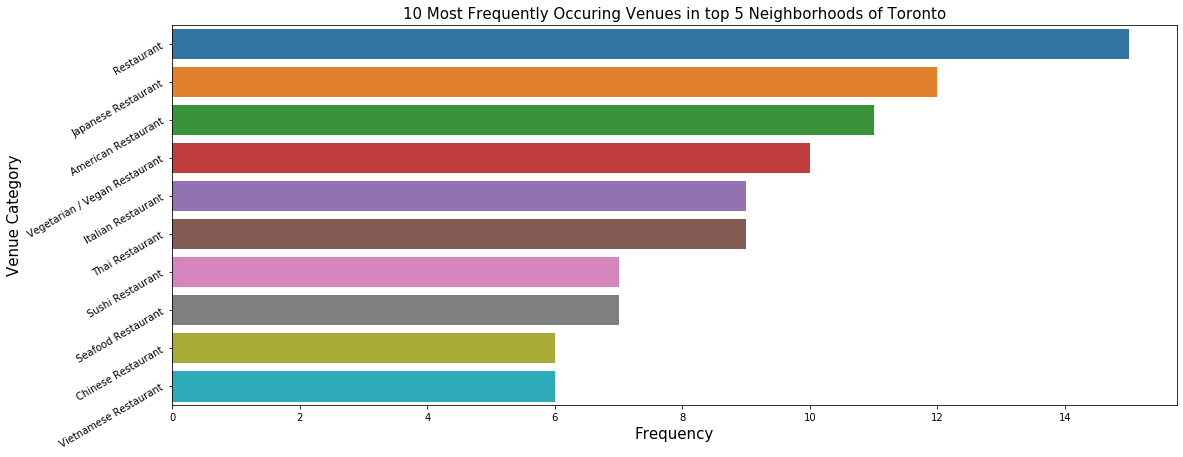

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(y="Venue Category", x="Frequency", data=df_tor_top10_mfven)
s.set_yticklabels(s.get_yticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in top 5 Neighborhoods of Toronto', fontsize=15)
plt.ylabel("Venue Category", fontsize=15)
plt.xlabel ("Frequency", fontsize=15)
#plt.savefig("10Most_Freq_Venues.png", dpi=300)
plt.show()

Also, created a bar chart to show the top 5 neighborhoods with maximum number of restaurants.

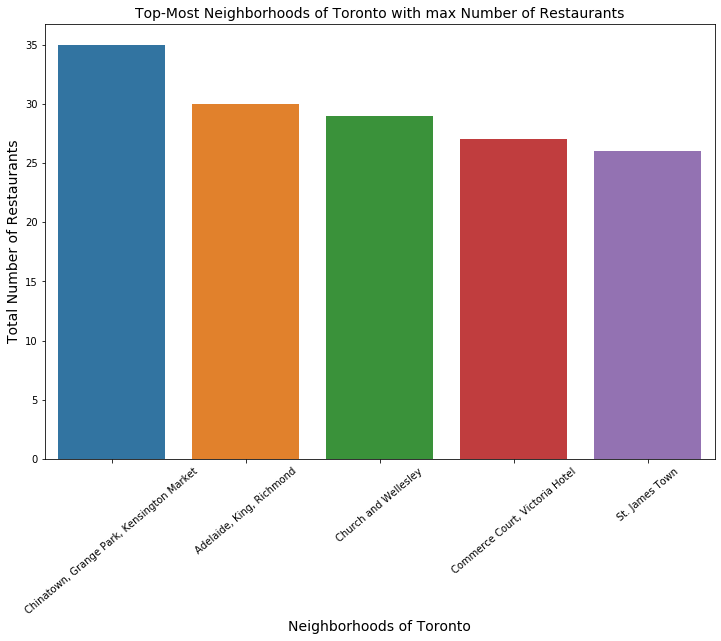

In [25]:
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Neighborhood', y='Number of Restaurants', data=tor_resven_top)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Neighborhoods of Toronto", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Top-Most Neighborhoods of Toronto with max Number of Restaurants", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

Next, I would like to explore the Indian Restaurants in those top 5 neighborhoods.

In [26]:
df_indian_res = df_top5_neigh[df_top5_neigh['Venue Category'].str.contains("Indian Restaurant")].reset_index(drop=True)
df_indian_res = df_indian_res.groupby('Neighborhood')['Venue Category'].count()
df_indian_res = df_indian_res.to_frame().sort_values('Venue Category' , ascending=False).reset_index()
df_indian_res.columns = ['Neighborhood','Number of Restaurants']
df_indian_res.head()

,Neighborhood,Number of Restaurants
0,"Adelaide, King, Richmond",1
1,Church and Wellesley,1
2,St. James Town,1


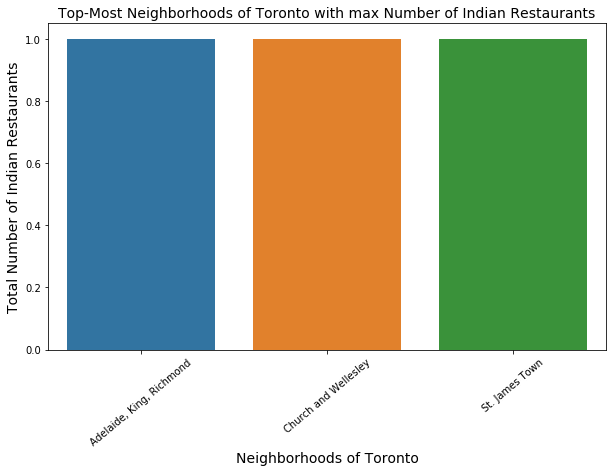

In [27]:
fig = plt.figure(figsize=(10,6))
bar = sns.barplot(x='Neighborhood', y='Number of Restaurants', data=df_indian_res)

bar.set_ylabel("Total Number of Indian Restaurants", fontsize=14)
bar.set_xlabel("Neighborhoods of Toronto", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Top-Most Neighborhoods of Toronto with max Number of Indian Restaurants", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

I found 3 out of the top 5 neighborhoods has a Indian Restaurant.

### Analyze Top 5 Neighborhood

In [28]:
# one hot encoding
toronto_onehot = pd.get_dummies(df_top5_neigh[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = df_top5_neigh['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Chinatown, Grange Park, Kensington Market",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,"Chinatown, Grange Park, Kensington Market",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,"Chinatown, Grange Park, Kensington Market",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,"Chinatown, Grange Park, Kensington Market",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Chinatown, Grange Park, Kensington Market",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
toronto_onehot.shape

(147, 38)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [30]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Adelaide, King, Richmond",0.000000,0.133333,0.100000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.033333,0.033333,0.066667,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.100000,0.033333,0.100000,0.133333,0.000000,0.033333,0.000000
1,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.028571,0.000000,0.057143,0.114286,0.000000,0.028571,0.028571,0.028571,0.114286,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.028571,0.028571,0.000000,0.000000,0.114286,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.171429,0.142857
2,Church and Wellesley,0.034483,0.034483,0.000000,0.000000,0.000000,0.034483,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.034483,0.172414,0.000000,0.068966,0.034483,0.000000,0.000000,0.000000,0.034483,0.103448,0.034483,0.137931,0.034483,0.034483,0.000000,0.034483
3,"Commerce Court, Victoria Hotel",0.000000,0.148148,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.037037,0.037037,0.037037,0.000000,0.000000,0.074074,0.074074,0.037037,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.148148,0.111111,0.000000,0.074074,0.000000,0.074074,0.000000
4,St. James Town,0.000000,0.076923,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.038462,0.000000,0.038462,0.000000,0.000000,0.000000,0.038462,0.153846,0.076923,0.038462,0.000000,0.000000,0.038462,0.038462,0.038462,0.000000,0.192308,0.076923,0.000000,0.038462,0.000000,0.038462,0.000000


Let's confirm the new size

In [31]:
toronto_grouped.shape

(5, 38)

Let's print each neighborhood along with the top 5 most common venues.

In [32]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0  American Restaurant  0.13
1      Thai Restaurant  0.13
2     Asian Restaurant  0.10
3     Sushi Restaurant  0.10
4           Restaurant  0.10


----Chinatown, Grange Park, Kensington Market----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.17
1          Vietnamese Restaurant  0.14
2             Chinese Restaurant  0.11
3            Dumpling Restaurant  0.11
4             Mexican Restaurant  0.11


----Church and Wellesley----
                      venue  freq
0       Japanese Restaurant  0.17
1          Sushi Restaurant  0.14
2                Restaurant  0.10
3      Fast Food Restaurant  0.07
4  Mediterranean Restaurant  0.07


----Commerce Court, Victoria Hotel----
                 venue  freq
0  American Restaurant  0.15
1           Restaurant  0.15
2   Seafood Restaurant  0.11
3   Italian Restaurant  0.07
4  Japanese Restaurant  0.07


----St. James Town----
                 venue  freq
0  

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant
1,"Chinatown, Grange Park, Kensington Market",Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
2,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant
3,"Commerce Court, Victoria Hotel",American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant
4,St. James Town,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant


### Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [35]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 2, 4, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_top5_neigh

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Neighborhood,Number of Restaurants,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Chinatown, Grange Park, Kensington Market",35,43.653206,-79.400049,Seven Lives - Tacos y Mariscos,43.654418,-79.400545,Mexican Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
1,"Chinatown, Grange Park, Kensington Market",35,43.653206,-79.400049,Banh Mi Nguyen Huong,43.653628,-79.398376,Vietnamese Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
2,"Chinatown, Grange Park, Kensington Market",35,43.653206,-79.400049,Saigon Lotus Restaurant,43.654311,-79.399225,Vietnamese Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
3,"Chinatown, Grange Park, Kensington Market",35,43.653206,-79.400049,Golden Patty,43.654659,-79.401179,Caribbean Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
4,"Chinatown, Grange Park, Kensington Market",35,43.653206,-79.400049,Torteria San Cosme,43.654702,-79.400646,Mexican Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant


Finally, let's visualize the resulting clusters

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Venue Latitude'], toronto_merged['Venue Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Results ##

Finally, I am analyzing the top 10 most common venues in the top 5 neighborhoods. For this, the clusters created using the K-Means algorithm will be of great help and let us examing each cluster.

#### Examine Clusters

In [38]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(7, toronto_merged.shape[1]))]]

,Neighborhood,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
121,St. James Town,Japanese Restaurant,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant
122,St. James Town,Italian Restaurant,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant
123,St. James Town,Restaurant,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant
124,St. James Town,Middle Eastern Restaurant,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant
125,St. James Town,Japanese Restaurant,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant
126,St. James Town,Restaurant,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant
127,St. James Town,American Restaurant,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant
128,St. James Town,Italian Restaurant,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant
129,St. James Town,Thai Restaurant,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant
130,St. James Town,New American Restaurant,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Latin American Restaurant


In [39]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(7, toronto_merged.shape[1]))]]

,Neighborhood,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Chinatown, Grange Park, Kensington Market",Mexican Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
1,"Chinatown, Grange Park, Kensington Market",Vietnamese Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
2,"Chinatown, Grange Park, Kensington Market",Vietnamese Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
3,"Chinatown, Grange Park, Kensington Market",Caribbean Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
4,"Chinatown, Grange Park, Kensington Market",Mexican Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
5,"Chinatown, Grange Park, Kensington Market",Vegetarian / Vegan Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
6,"Chinatown, Grange Park, Kensington Market",Caribbean Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
7,"Chinatown, Grange Park, Kensington Market",Belgian Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
8,"Chinatown, Grange Park, Kensington Market",Vegetarian / Vegan Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant
9,"Chinatown, Grange Park, Kensington Market",Comfort Food Restaurant,1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant


In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + list(range(7, toronto_merged.shape[1]))]]

,Neighborhood,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,Church and Wellesley,Theme Restaurant,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant
66,Church and Wellesley,Restaurant,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant
67,Church and Wellesley,Ramen Restaurant,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant
68,Church and Wellesley,Mexican Restaurant,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant
69,Church and Wellesley,Japanese Restaurant,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant
70,Church and Wellesley,Vietnamese Restaurant,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant
71,Church and Wellesley,Ethiopian Restaurant,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant
72,Church and Wellesley,Thai Restaurant,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant
73,Church and Wellesley,Italian Restaurant,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant
74,Church and Wellesley,Indian Restaurant,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant


In [41]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + list(range(7, toronto_merged.shape[1]))]]

,Neighborhood,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,"Adelaide, King, Richmond",Vegetarian / Vegan Restaurant,3,American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant
36,"Adelaide, King, Richmond",Greek Restaurant,3,American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant
37,"Adelaide, King, Richmond",Asian Restaurant,3,American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant
38,"Adelaide, King, Richmond",Seafood Restaurant,3,American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant
39,"Adelaide, King, Richmond",American Restaurant,3,American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant
40,"Adelaide, King, Richmond",Asian Restaurant,3,American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant
41,"Adelaide, King, Richmond",Sushi Restaurant,3,American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant
42,"Adelaide, King, Richmond",Colombian Restaurant,3,American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant
43,"Adelaide, King, Richmond",Brazilian Restaurant,3,American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant
44,"Adelaide, King, Richmond",Japanese Restaurant,3,American Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Greek Restaurant,Latin American Restaurant,Colombian Restaurant,Gluten-free Restaurant


In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + list(range(7, toronto_merged.shape[1]))]]

,Neighborhood,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,"Commerce Court, Victoria Hotel",Restaurant,4,American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant
95,"Commerce Court, Victoria Hotel",American Restaurant,4,American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant
96,"Commerce Court, Victoria Hotel",Japanese Restaurant,4,American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant
97,"Commerce Court, Victoria Hotel",Restaurant,4,American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant
98,"Commerce Court, Victoria Hotel",Gluten-free Restaurant,4,American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant
99,"Commerce Court, Victoria Hotel",Seafood Restaurant,4,American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant
100,"Commerce Court, Victoria Hotel",Restaurant,4,American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant
101,"Commerce Court, Victoria Hotel",New American Restaurant,4,American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant
102,"Commerce Court, Victoria Hotel",American Restaurant,4,American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant
103,"Commerce Court, Victoria Hotel",French Restaurant,4,American Restaurant,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Latin American Restaurant,Gluten-free Restaurant


The results of the exploratory data analysis and clustering are:

Japanese Restaurants tops the chart in the top 5 neighborhoods.  

Indian Restaurant is one of the top 10 venue in St. James Town and presence in Church and Wellesley and Adelaide, King, Richmond neighborhoods.  

Popular restaurants in each neighborhood:  
    1. St. James Town: Italian, American, Japanese  
    2. Chinatown, Grange Park, Kensington Market: Vietnamese, Chinese  
    3. Church and Wellesley: Japanese  
    4. Adelaide, King, Richmond: American, Thai  
    5. Commerce Court, Victoria Hotel: American, Thai, Japanese  

As for restaurants, the Japanese Restaurants are very popular in the East Toronto area. Although, the clusters have variations, a very visible presence is the predominance of Asian Restaurants. It is very important to note that Clusters 1, 3 and 4 are the most suitable locations to open a brand Indian Restaurant.

## 5. Discussion ##

According to this analysis, it is very important to note that Clusters 1 and 3 are the most viable clusters to start a new Indian Restaurant. These 2 clusters do not have top restaurants that could rival their standards if they are opened. 

Some drawbacks of this analysis are: the clustering is completely based on the most common venues obtained
from Foursquare data. Since diverse population, accessible location, broad range of customers could all play a major role and thus, this analysis might definitely far from being conclusory. However, it definitely gives us some very important preliminary information on possibilities of opening restaurants around the important neighborhoods of Toronto.

## 6. Conclusion ## 

In conclusion, I have got a small glimpse of how real life data-science projects look like. I
have made use of some frequently used python libraries to scrap web-data, use Foursquare API to explore the
major districts of Tokyo and saw the results of segmentation of districts using Folium leaflet map. This project would have had better results if there were more data in terms of accessibility data within the area, traffic access and allowance of more venues exploration with the Foursquare (limited venues for free calls).

Also, getting the ratings and feedbacks of the current restaurants within the clusters would have helped in providing more insight into the best location. Finally, all of the analysis were mostly concentrated on the possibilities of opening a restaurant targeting the diverse population.

### Thank You !